Ofek Kirshnboim

Data used from [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [377]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as sts
import statsmodels.api as sm
from scipy.stats import shapiro, probplot, kstest, ttest_ind, mannwhitneyu, pearsonr, spearmanr, ttest_1samp, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [378]:
dtf = pd.read_csv("./house-prices/train.csv",index_col='Id')

In [379]:
dtf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [380]:
dtf.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [381]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
very_numerical = [nc for nc in numeric_columns if dtf[nc].nunique()>20]
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]

In [382]:
len(categorical_columns)

43

In [383]:
len(numeric_columns)

37

<Figure size 1000x600 with 0 Axes>

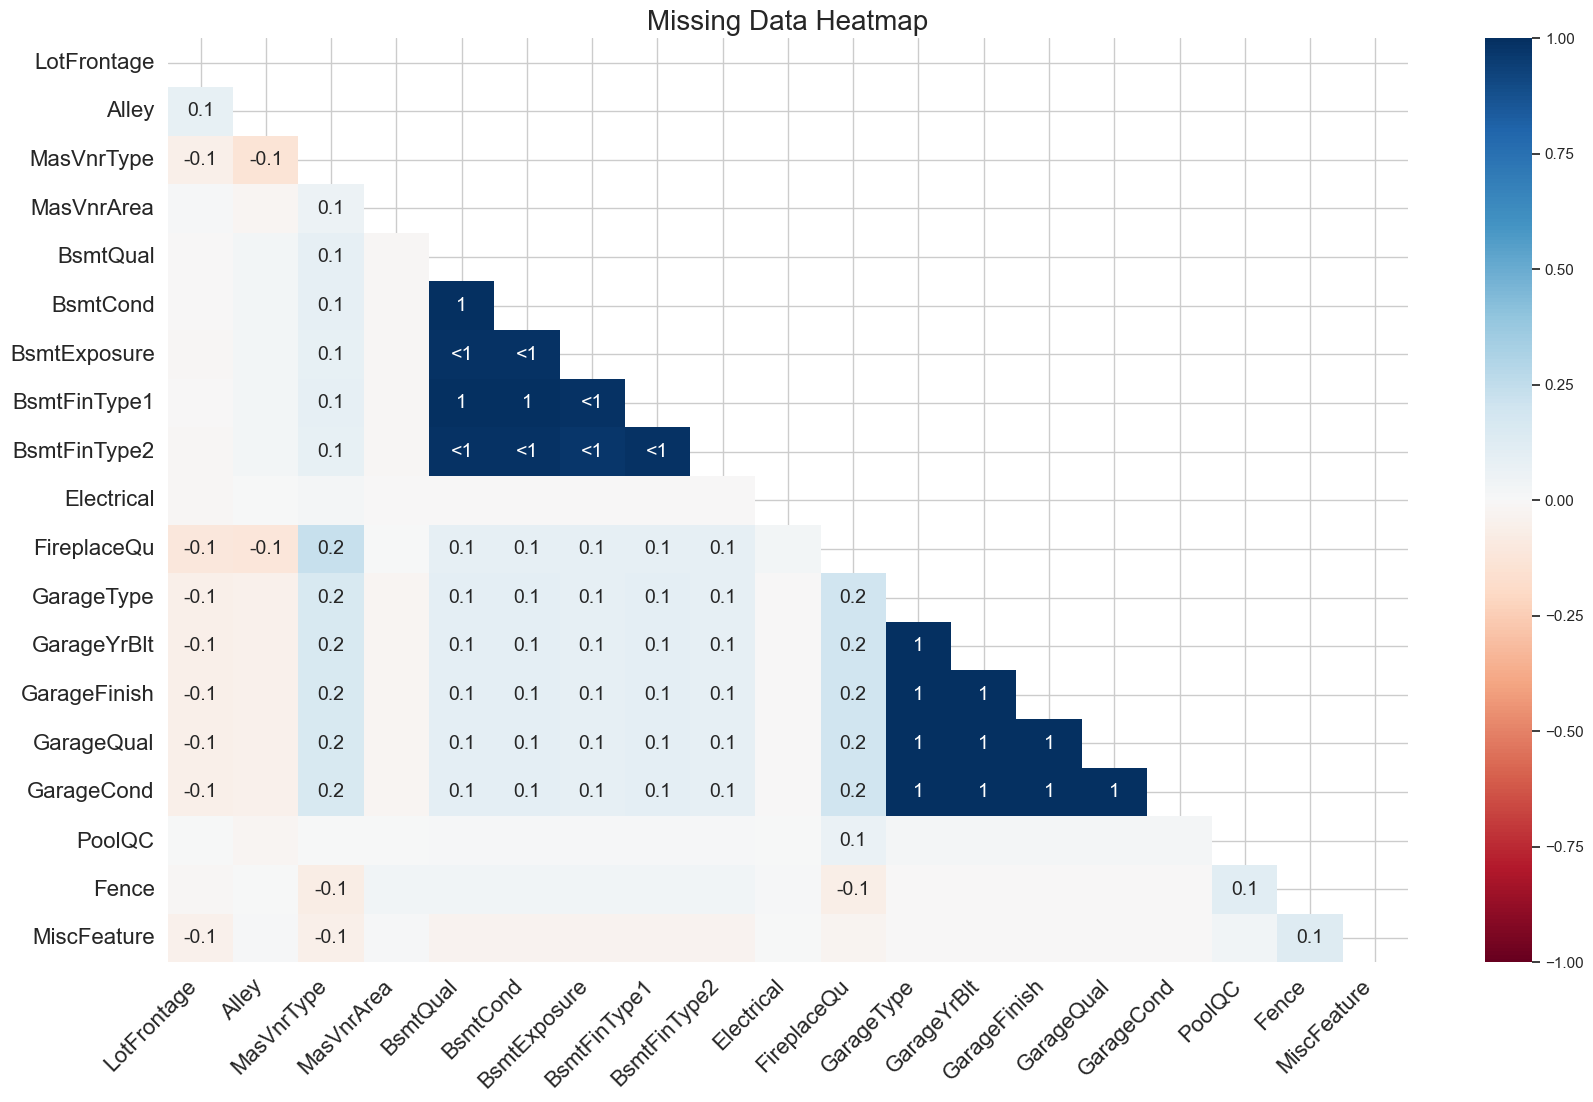

In [384]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing data heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(dtf)  # dtf is your dataframe
plt.title("Missing Data Heatmap", fontsize=20)
plt.savefig("plots/missing_data.png", dpi=300)
plt.show()


# Plotting Categorical Columns


Dropping and filling NA values for categorical columns:

1. drop if at least 70% are NA:

In [385]:
nul_cols = dtf[categorical_columns].isna().sum()/len(dtf)
drop_us = nul_cols[nul_cols>0.7]
drop_us

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [386]:
dtf=dtf.drop(drop_us.index,axis=1)
categorical_columns = list(set(categorical_columns)-set(drop_us.index))

2. Fill with a new 'na' category:

In [387]:
dtf[categorical_columns].fillna('na',inplace=True)


In [388]:
# Impute missing categorical values with 'None'
categorical_features_to_impute = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
dtf[categorical_features_to_impute] = dtf[categorical_features_to_impute].fillna('None')

# Impute missing numerical values with 0 or median
dtf['MasVnrArea'].fillna(0, inplace=True)
dtf['LotFrontage'].fillna(dtf.groupby('Neighborhood')['LotFrontage'].transform('median'), inplace=True)
dtf['GarageYrBlt'].fillna(0, inplace=True)


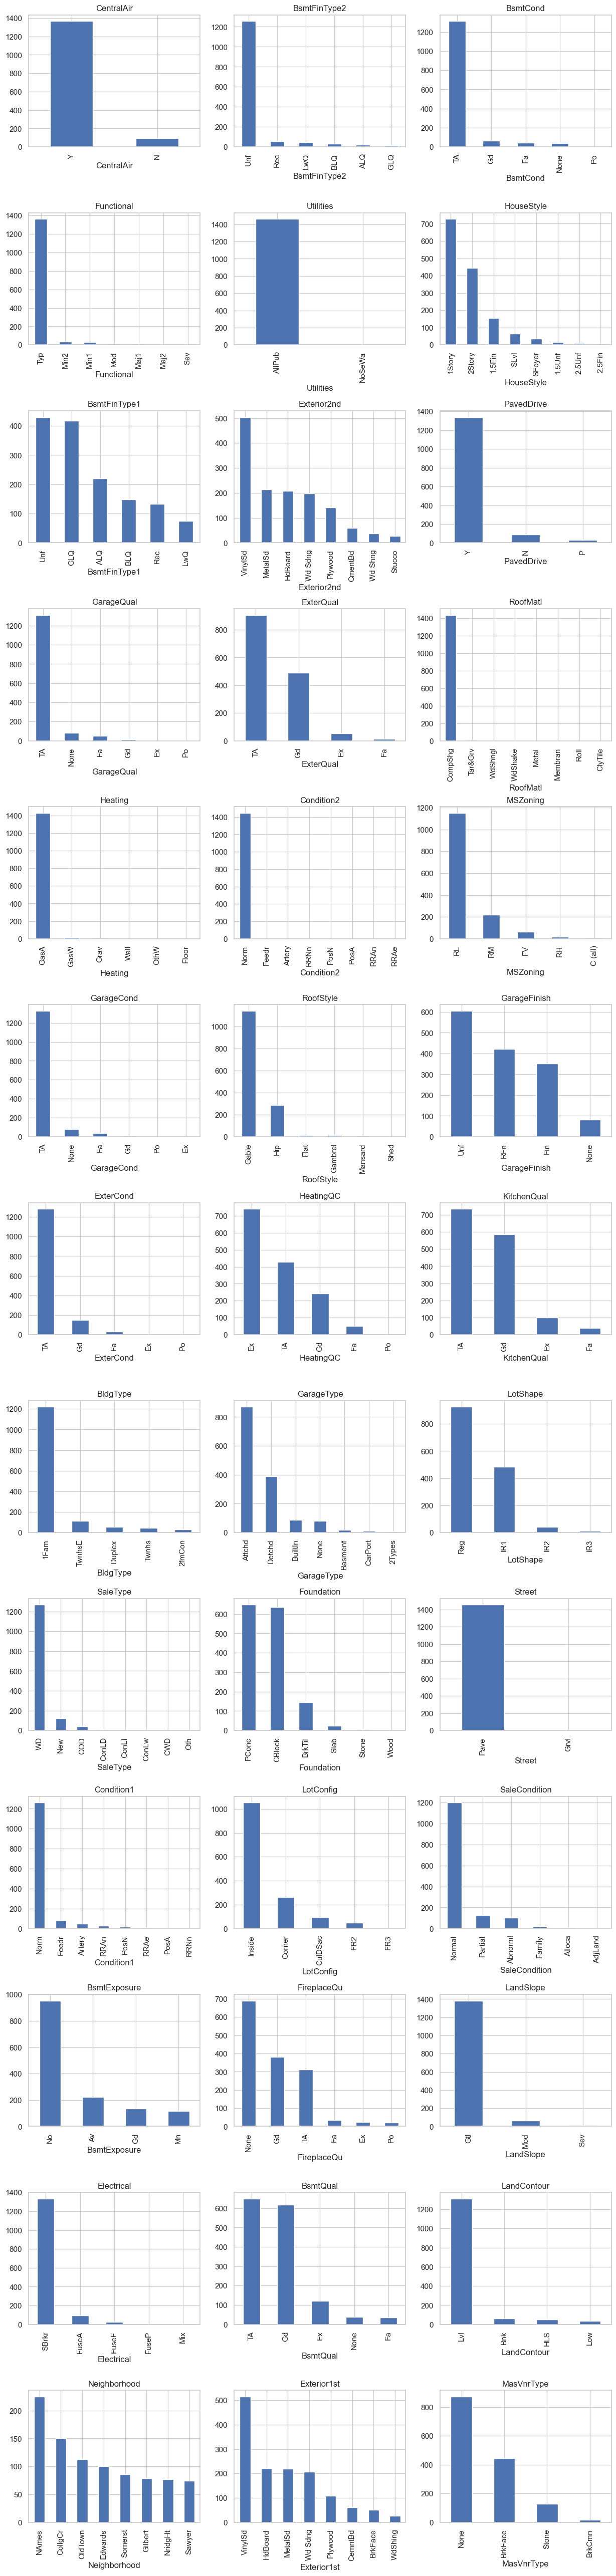

In [389]:
# Define number of columns and rows for the subplot grid
n = len(categorical_columns)
cols = 3
rows = (n // cols) + (1 if n % cols != 0 else 0)
max_bars = 8

# Generate a figures grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(categorical_columns):
    # Calculate the current place on the grid
    r = int(i / cols)
    c = i % cols
    
    # Create the "value counts" for the first <max_bars> categories
    u = min(dtf[column].nunique(), max_bars)
    vc = dtf[column].value_counts()[:u]
    
    # Plot a bar chart using Pandas
    if rows > 1:
        vc.plot(kind='bar', ax=axes[r, c], title=column)
    else:
        vc.plot(kind='bar', ax=axes[c], title=column)

# Remove empty subplots
if n % cols != 0:
    for j in range(n, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

# Plotting Numeric Columns


In [390]:
na_columns = dtf[very_numerical].isna().sum()
na_columns = na_columns[na_columns>0]
na_columns

Series([], dtype: int64)

Filling Null Values with the column's mean

In [391]:
for nc in na_columns.index:
    dtf[nc].fillna(dtf[nc].mean(),inplace=True)

# Histogram + KDE

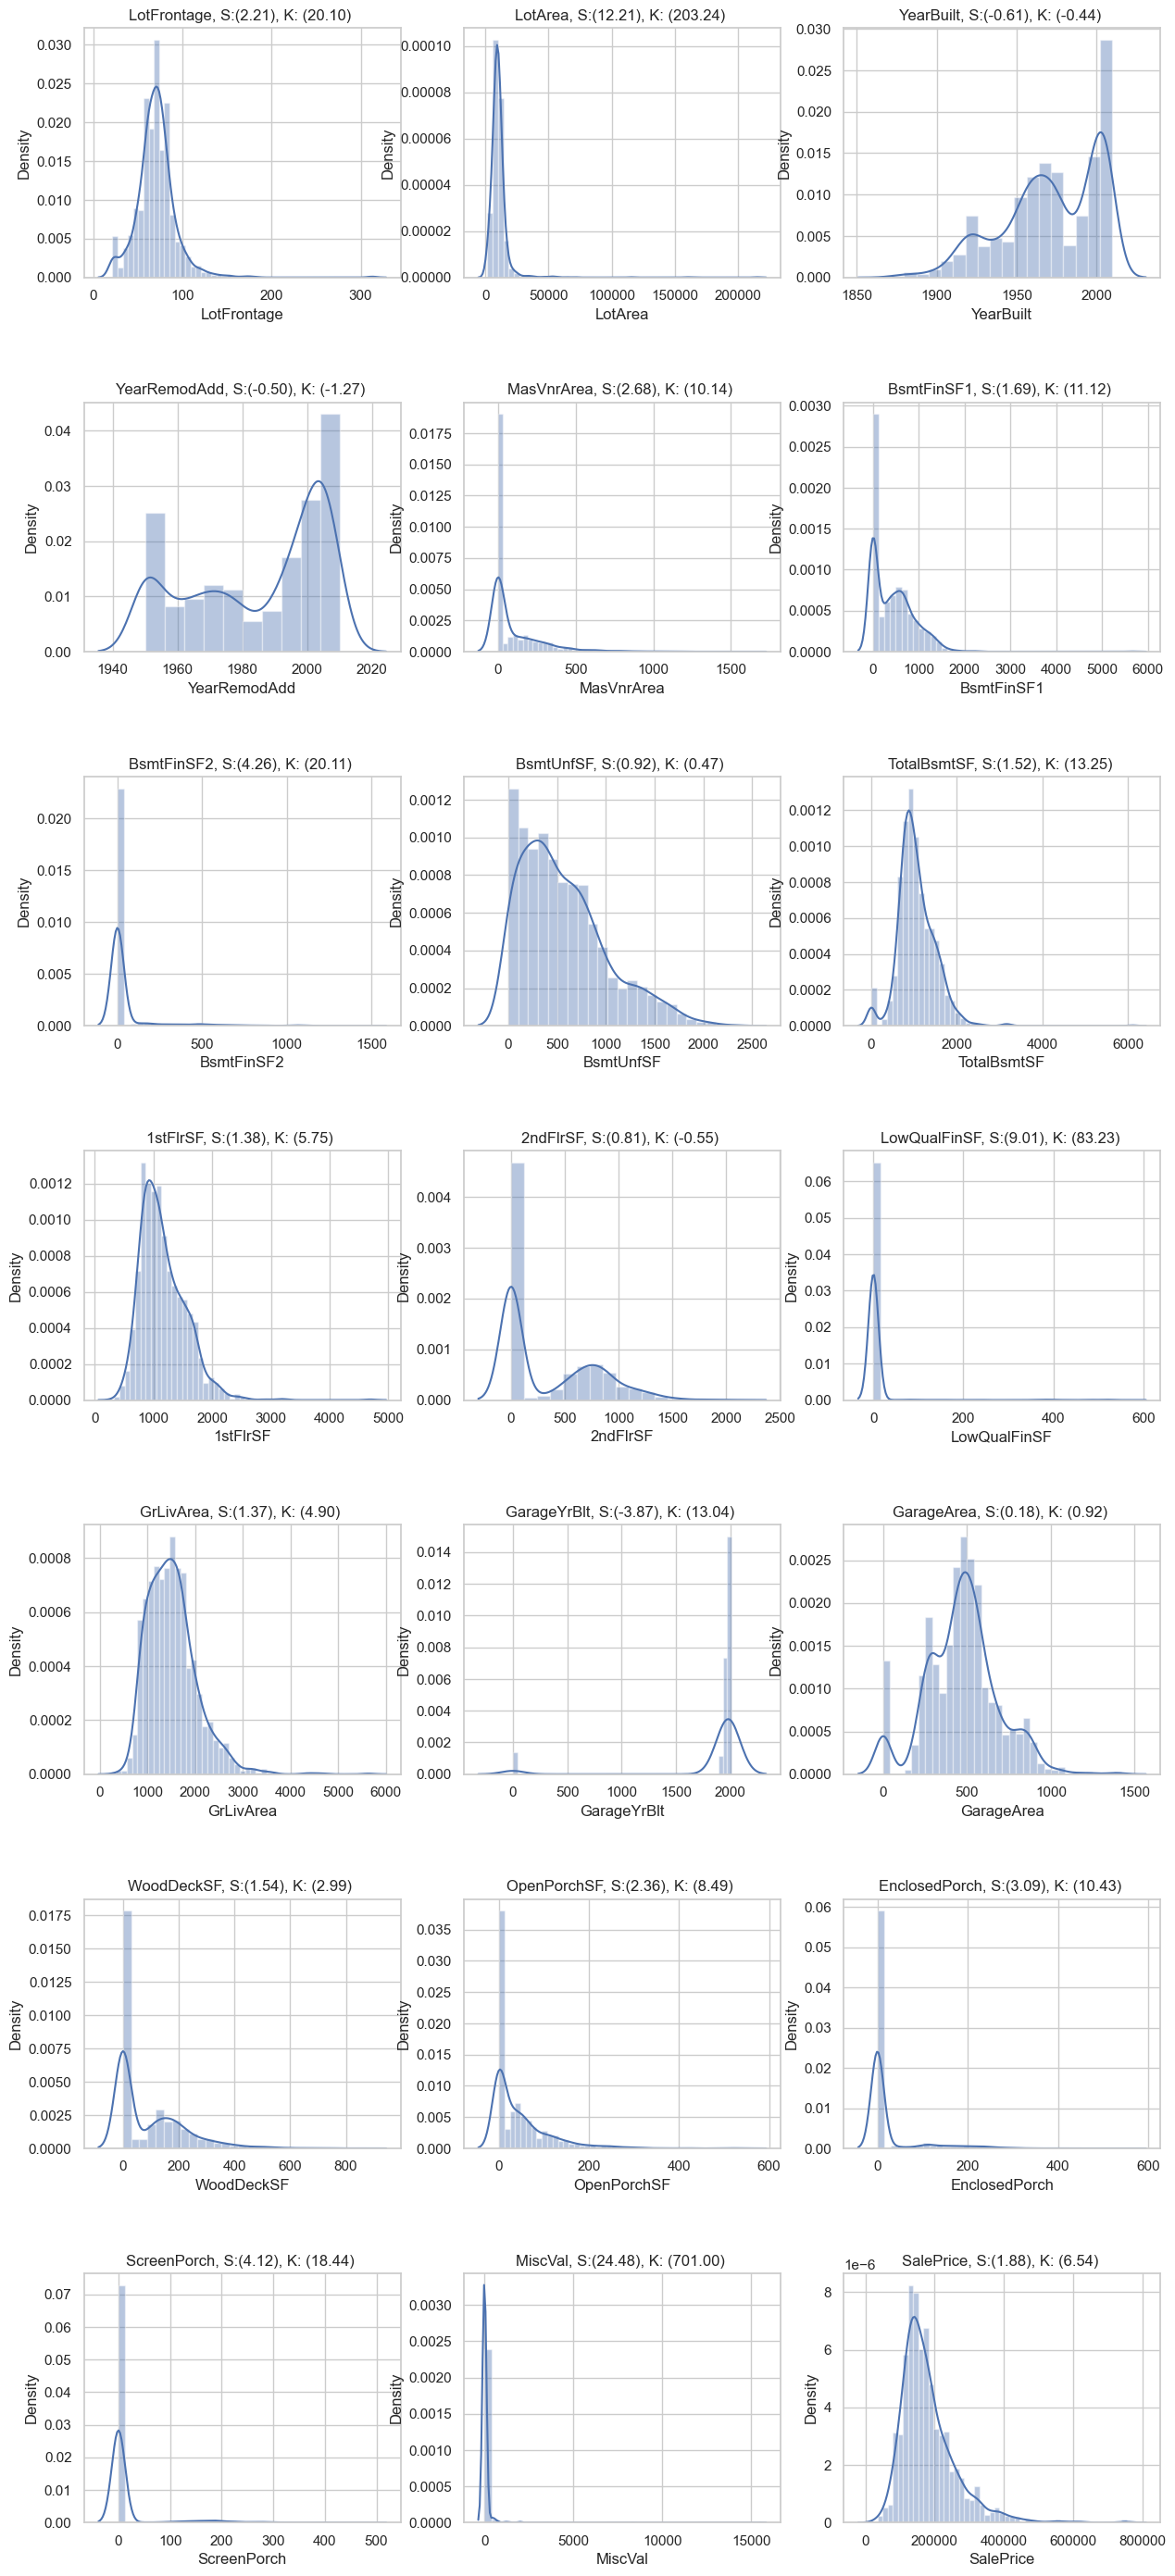

In [392]:
#we will create a histogram for each categorical attribute
n=len(very_numerical)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else n//3

#generate a figures grid:
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)

#Fill the plots:
for i, column in enumerate(very_numerical):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    
    # build the histograms
    #dtf[column].hist(ax=axes[r,c],kde=True)
    sns.distplot(dtf[column],ax=axes[r,c],kde=True)
    axes[r,c].set_title(f"{column}, S:({dtf[column].skew():.2f}), K: ({dtf[column].kurt():.2f}) ")



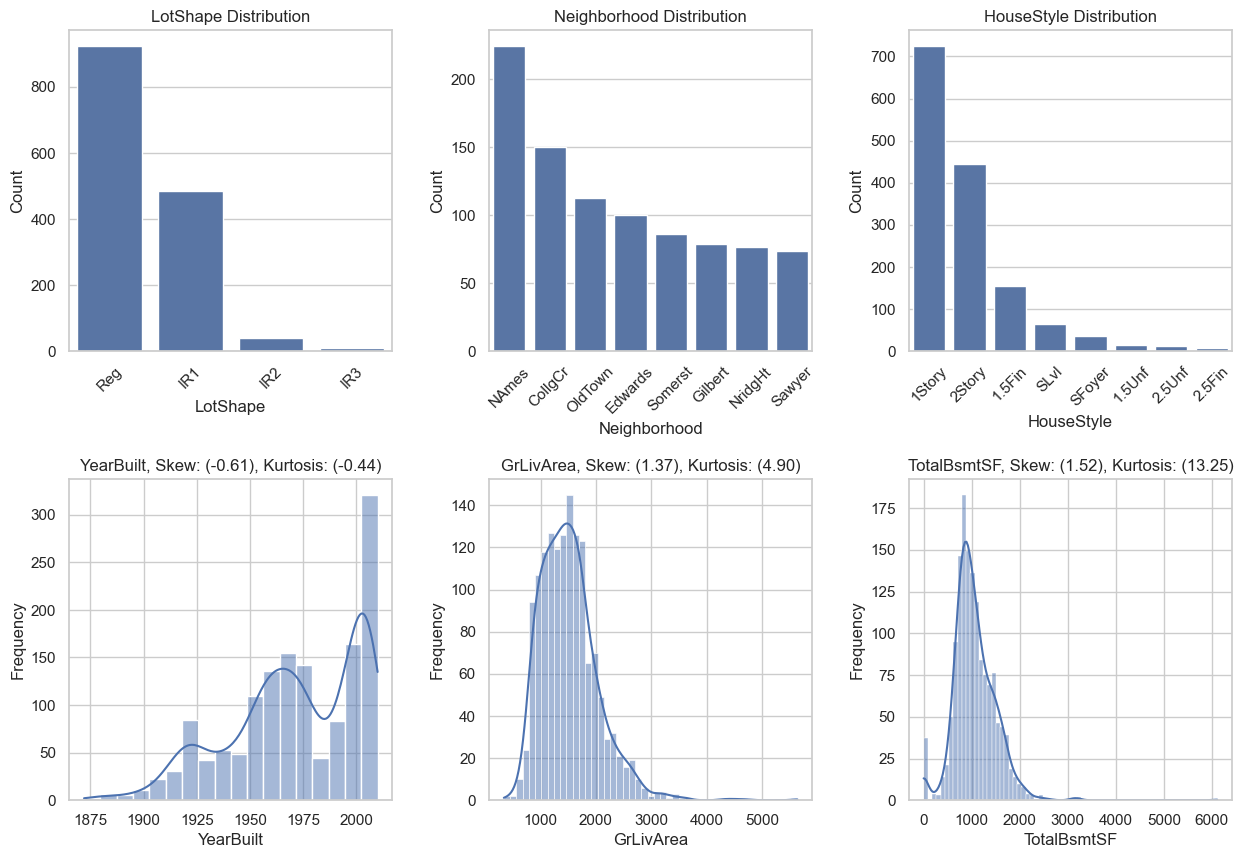

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features for the subplots
categorical_features = ['LotShape', 'Neighborhood', 'HouseStyle']
numerical_features = ['YearBuilt', 'GrLivArea', 'TotalBsmtSF']

# Create a 2x3 subplot grid (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the size to fit the plots well
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between subplots

# Plot categorical features (bar plots for the top row)
for i, column in enumerate(categorical_features):
    # Create a bar plot for each categorical feature
    vc = dtf[column].value_counts()[:8]  # Limit to the top 8 categories
    sns.barplot(x=vc.index, y=vc.values, ax=axes[0, i])
    axes[0, i].set_title(f'{column} Distribution')
    axes[0, i].set_xlabel(column)
    axes[0, i].set_ylabel('Count')
    axes[0, i].tick_params(axis='x', rotation=45)

# Plot numerical features (histograms with KDE for the bottom row)
for i, column in enumerate(numerical_features):
    sns.histplot(dtf[column], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'{column} Distribution')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].set_title(f"{column}, Skew: ({dtf[column].skew():.2f}), Kurtosis: ({dtf[column].kurt():.2f})")

# Show the plots
plt.savefig('plots/distribution.png', dpi=300)
plt.show()


# Examining the target feature - "SalePrice"


<Axes: >

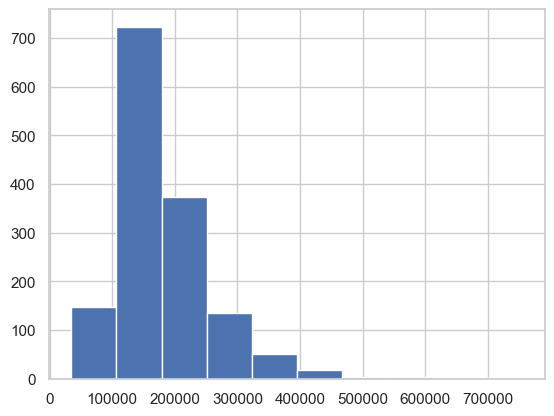

In [394]:
dtf.SalePrice.hist()


<Axes: xlabel='SalePrice', ylabel='Density'>

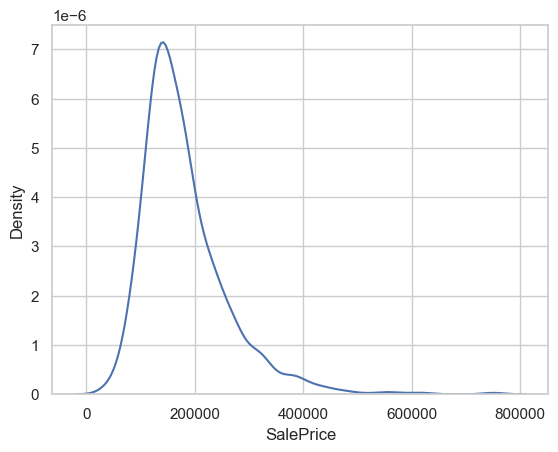

In [395]:
sns.kdeplot(dtf.SalePrice)


<Axes: ylabel='SalePrice'>

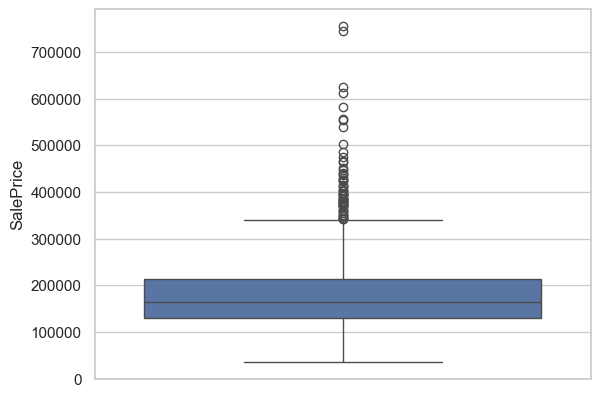

In [396]:
sns.boxplot(dtf.SalePrice)

# Handling Skewness:
Box-Cox Transform

The Box-Cox transformation is defined as:

$$
y(\lambda) =
\begin{cases} 
\frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\log{y}, & \text{if } \lambda = 0
\end{cases}
$$

<Axes: >

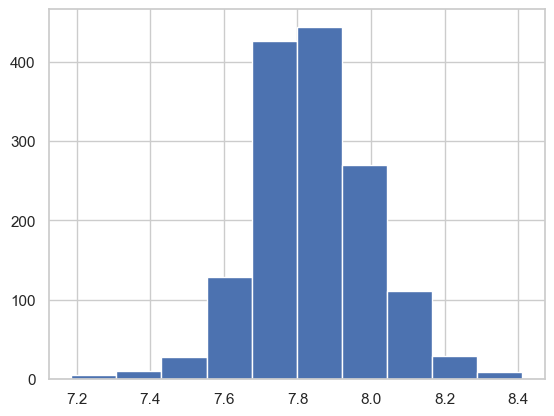

In [397]:
bc = sts.boxcox
bc_price, lmda  = bc(dtf.SalePrice)
bc_price = pd.Series(bc_price)
bc_price.hist()

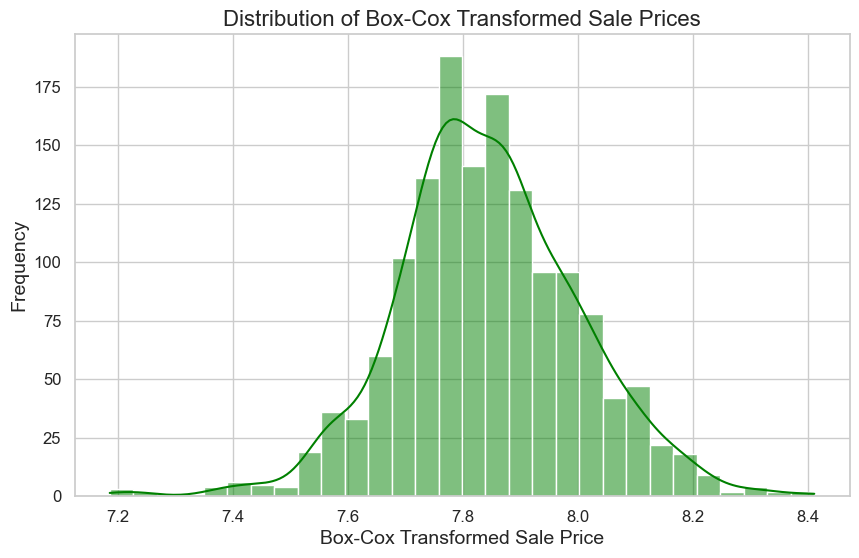

In [398]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(bc_price, bins=30, kde=True, color='green')

# Add titles and labels
plt.title('Distribution of Box-Cox Transformed Sale Prices', fontsize=16)
plt.xlabel('Box-Cox Transformed Sale Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the tick marks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

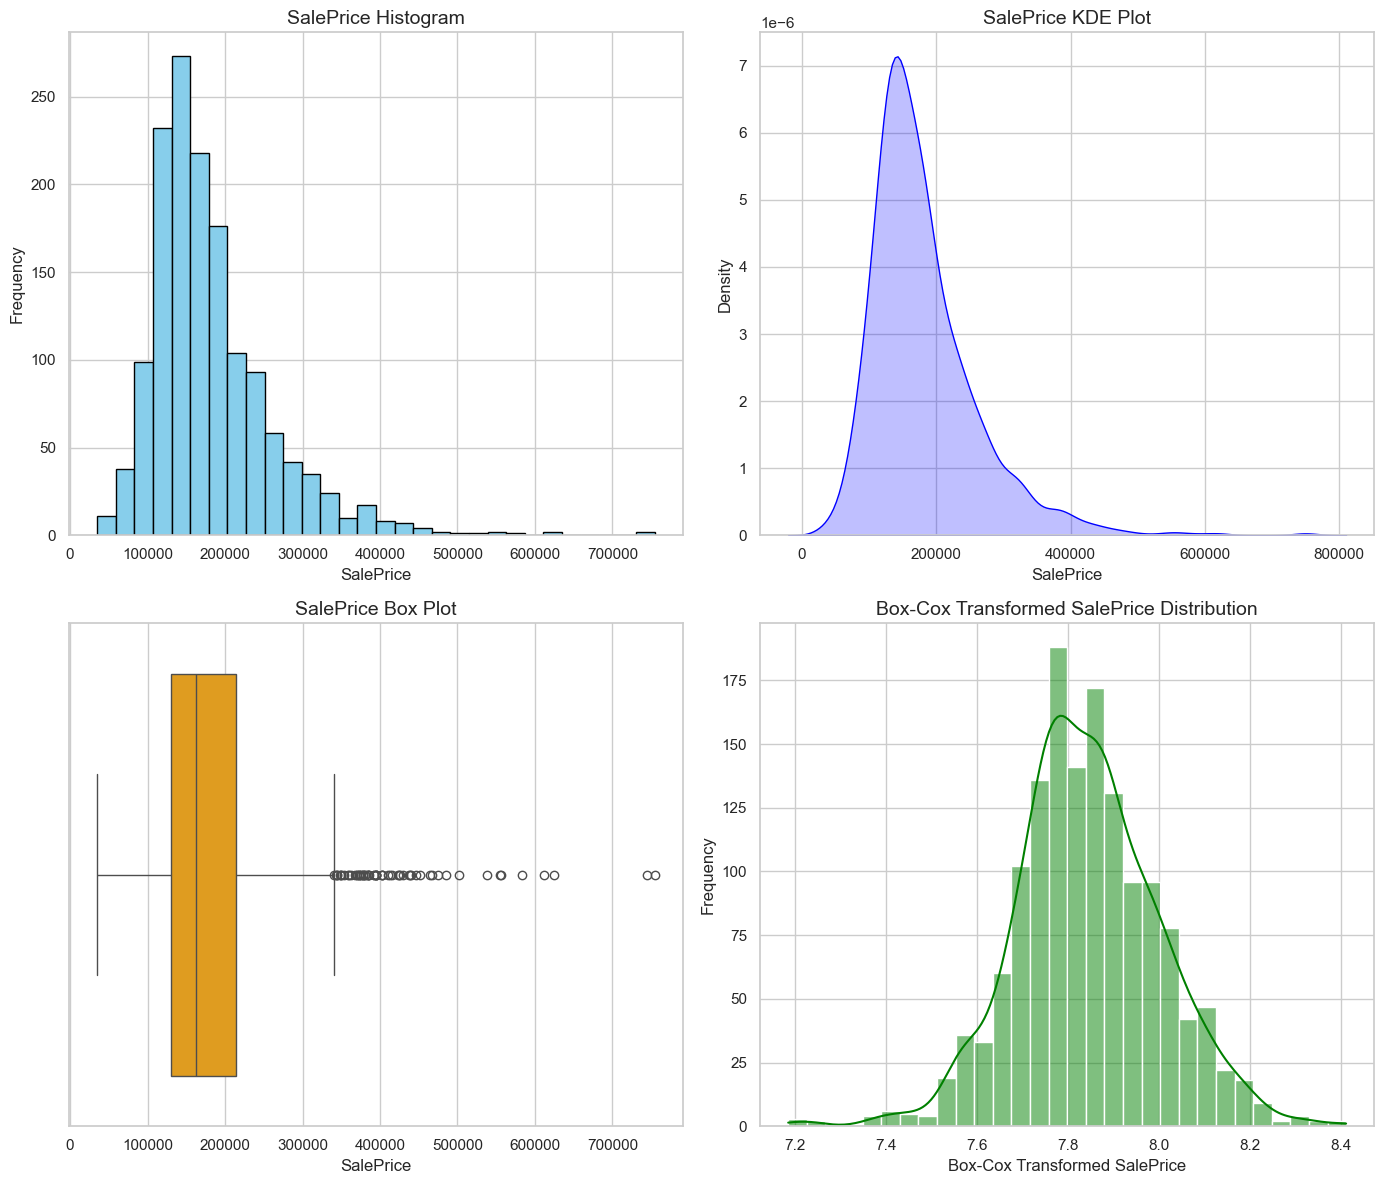

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the Box-Cox transformation of SalePrice
bc_price, _ = stats.boxcox(dtf.SalePrice)

# Create the figure with a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Original SalePrice Histogram
axes[0, 0].hist(dtf.SalePrice, bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('SalePrice Histogram', fontsize=14)
axes[0, 0].set_xlabel('SalePrice', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Plot 2: Original SalePrice KDE Plot
sns.kdeplot(dtf.SalePrice, ax=axes[0, 1], color='blue', shade=True)
axes[0, 1].set_title('SalePrice KDE Plot', fontsize=14)
axes[0, 1].set_xlabel('SalePrice', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)

# Plot 3: Original SalePrice Box Plot
sns.boxplot(x=dtf.SalePrice, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('SalePrice Box Plot', fontsize=14)
axes[1, 0].set_xlabel('SalePrice', fontsize=12)

# Plot 4: Box-Cox Transformed SalePrice Histogram with KDE
sns.histplot(bc_price, bins=30, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Box-Cox Transformed SalePrice Distribution', fontsize=14)
axes[1, 1].set_xlabel('Box-Cox Transformed SalePrice', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.savefig("plots/saleprice_plots.png", dpi=300)
# Show the plot
plt.show()
plt.close(fig)  # Close the figure after saving



Use Kolmogorov-smirnov to see how "normal" is the data now:

In [400]:
# Fit a normal distribution to the Box-Cox transformed SalePrice
m, s = sts.norm.fit(bc_price)

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = sts.ks_1samp(bc_price, sts.norm.cdf, args=(m, s))

# Output the results
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")

KS Statistic: 0.03557803467839482, p-value: 0.04845128639025731


In [401]:
# Perform Box-Cox transformation on SalePrice
bc_price, _ = stats.boxcox(dtf['SalePrice'])

# Fit normal distribution to the original SalePrice
m_orig, s_orig = sts.norm.fit(dtf['SalePrice'])
ks_stat_orig, p_value_orig = sts.ks_1samp(dtf['SalePrice'], sts.norm.cdf, args=(m_orig, s_orig))

# Fit normal distribution to the Box-Cox transformed SalePrice
m_bc, s_bc = sts.norm.fit(bc_price)
ks_stat_bc, p_value_bc = sts.ks_1samp(bc_price, sts.norm.cdf, args=(m_bc, s_bc))

# Create a DataFrame to hold the KS test results
ks_results = pd.DataFrame({
    'Test': ['Original SalePrice', 'Box-Cox Transformed SalePrice'],
    'KS Statistic': [ks_stat_orig, ks_stat_bc],
    'p-value': [p_value_orig, p_value_bc]
})

# Display the results in a table
print(ks_results)

                            Test  KS Statistic       p-value
0             Original SalePrice      0.123670  6.402140e-20
1  Box-Cox Transformed SalePrice      0.035578  4.845129e-02


If just running a transformation doesn't work then another solution is to drop anomalies and then run a transformation.

Let's focus on ScreenPorch feature:

<Axes: >

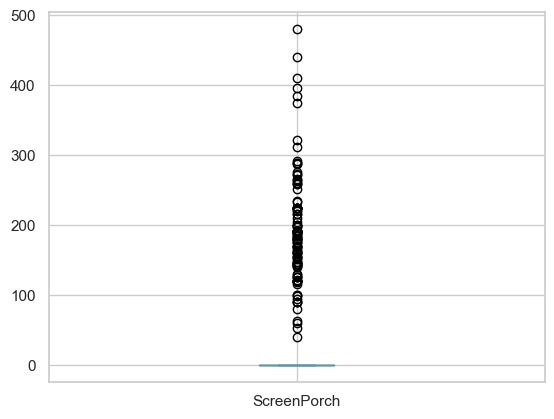

In [402]:
dtf.ScreenPorch.plot(kind="box")

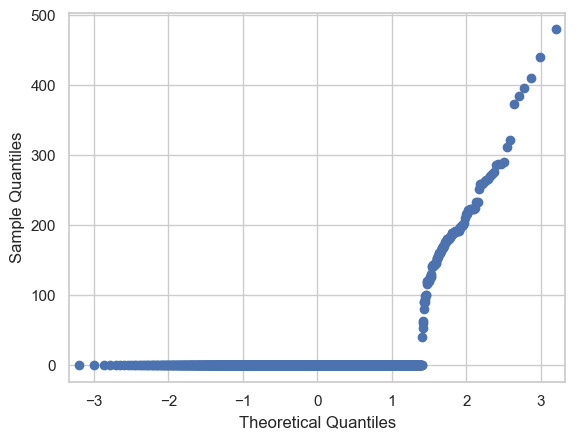

In [403]:
p=sm.qqplot(dtf.ScreenPorch)

<Axes: >

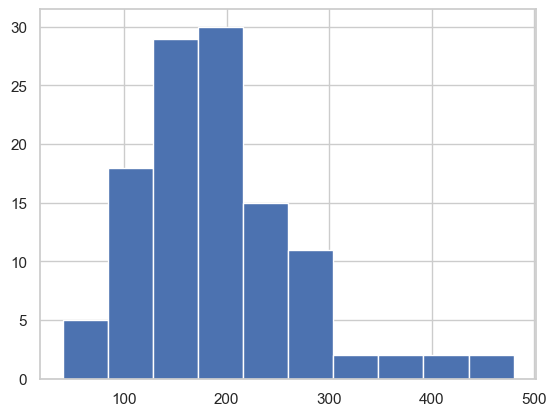

In [404]:
new_porch = dtf.ScreenPorch.apply(lambda x: x if x>0 else None).dropna()
new_porch.hist()

In [405]:
m, s = sts._continuous_distns.norm.fit(new_porch)
sts.ks_1samp(new_porch.values,sts._continuous_distns.norm.cdf,args=(m,s))


KstestResult(statistic=np.float64(0.1361568660311473), pvalue=np.float64(0.02451151820985864), statistic_location=np.float64(200.0), statistic_sign=np.int8(1))

need to add a conclution about the p value

In [406]:
bc_price, lmda  = bc(new_porch)
bc_price = pd.Series(bc_price)
m,s =sts._continuous_distns.norm.fit(bc_price)
sts.ks_1samp(bc_price.values,sts._continuous_distns.norm.cdf,args=(m,s))

KstestResult(statistic=np.float64(0.0803741045035904), pvalue=np.float64(0.41986569867526513), statistic_location=np.float64(12.531238738665339), statistic_sign=np.int8(1))

י

# Two-Sample Kolmogorov-Smirnov

We can use Kolmogorov-Smirnov too examine, e.g., whether the train and test come from the same distributions:


In [407]:
dtf_test = pd.read_csv("./house-prices/test.csv",index_col='Id')

In [408]:
sts.ks_2samp(dtf.GrLivArea,dtf_test.GrLivArea)

KstestResult(statistic=np.float64(0.04636972217788502), pvalue=np.float64(0.08165723197507636), statistic_location=np.int64(1655), statistic_sign=np.int8(-1))

In [409]:
#filling null values using the train:
for nc in na_columns.index:
    dtf_test[nc].fillna(dtf[nc].mean(),inplace=True)

dtf_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


### Comparing all numeric test/train columns:

In [410]:
ks_res=[]
for col in very_numerical:
    try:
        res,pval = sts.ks_2samp(dtf[col],dtf_test[col])
        ks_res.append({'col':col,'ks_score':res,'p_val':pval})
    except:
        pass
ks_df = pd.DataFrame(ks_res)
ks_df.sort_values('p_val',ascending=True)

,col,ks_score,p_val
10,2ndFlrSF,0.047094,0.073708
12,GrLivArea,0.046370,0.081657
1,LotArea,0.037240,0.255929
3,YearRemodAdd,0.037196,0.257689
17,EnclosedPorch,0.029570,0.534348
9,1stFlrSF,0.022688,0.835681
16,OpenPorchSF,0.020233,0.916998
18,ScreenPorch,0.019927,0.926383
15,WoodDeckSF,0.017017,0.980294
2,YearBuilt,0.015183,0.994752


Let's look at two columns:
1. GrLivArea - slightly different
2. YearBuilt - almost the same

<Axes: xlabel='GrLivArea'>

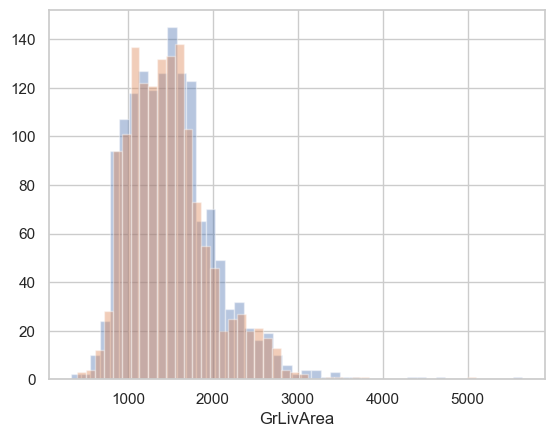

In [411]:
fig,ax = plt.subplots()
sns.distplot(dtf.GrLivArea,ax=ax,kde=False)
sns.distplot(dtf_test.GrLivArea,ax=ax,kde=False)

<Axes: xlabel='YearBuilt'>

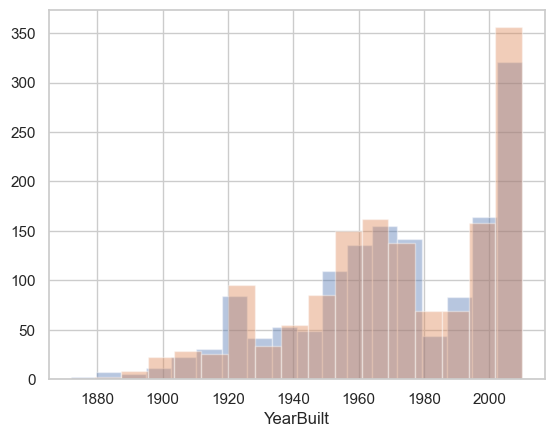

In [412]:
fig,ax = plt.subplots()
sns.distplot(dtf.YearBuilt,ax=ax,kde=False)
sns.distplot(dtf_test.YearBuilt,ax=ax,kde=False)

Can't see major differences, trying a Box plot:

Text(0.5, 1.0, 'Test')

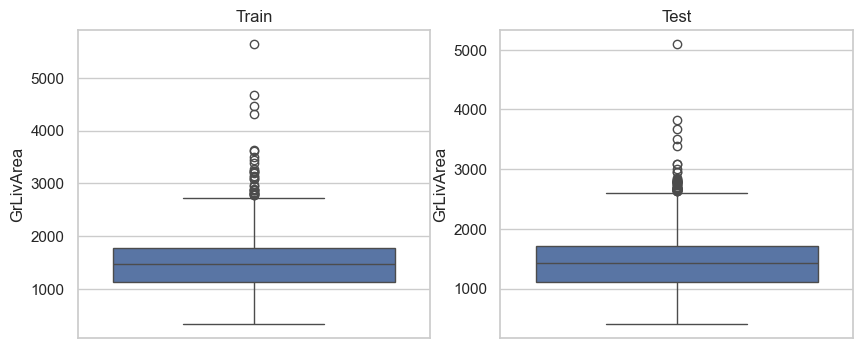

In [413]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.boxplot(dtf.GrLivArea,ax=axes[0]).set_title('Train')
sns.boxplot(dtf_test.GrLivArea,ax=axes[1]).set_title('Test')

Text(0.5, 1.0, 'Test')

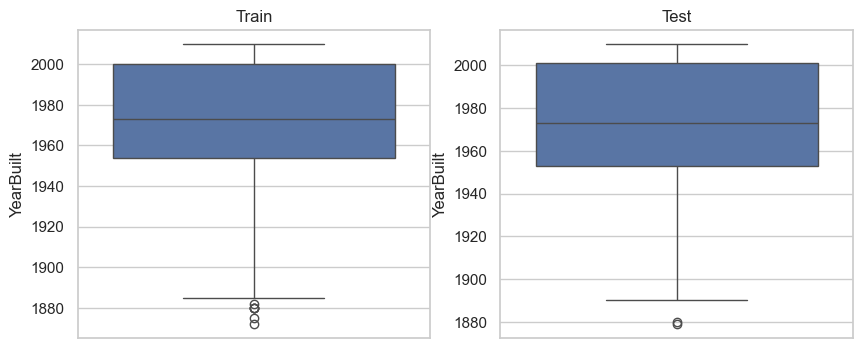

In [414]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.boxplot(dtf.YearBuilt,ax=axes[0]).set_title('Train')
sns.boxplot(dtf_test.YearBuilt,ax=axes[1]).set_title('Test')

To make sure, let's compare their statistics using `pd.Series.describe()`



In [415]:
describe_df=pd.DataFrame([dtf.GrLivArea.describe(),dtf_test.GrLivArea.describe()]).T
describe_df.columns=['Train','Test']
describe_df

,Train,Test
count,1460.000000,1459.000000
mean,1515.463699,1486.045922
std,525.480383,485.566099
min,334.000000,407.000000
25%,1129.500000,1117.500000
50%,1464.000000,1432.000000
75%,1776.750000,1721.000000
max,5642.000000,5095.000000


In [416]:
describe_df=pd.DataFrame([dtf.YearBuilt.describe(),dtf_test.YearBuilt.describe()]).T
describe_df.columns=['Train','Test']
describe_df

,Train,Test
count,1460.000000,1459.000000
mean,1971.267808,1971.357779
std,30.202904,30.390071
min,1872.000000,1879.000000
25%,1954.000000,1953.000000
50%,1973.000000,1973.000000
75%,2000.000000,2001.000000
max,2010.000000,2010.000000


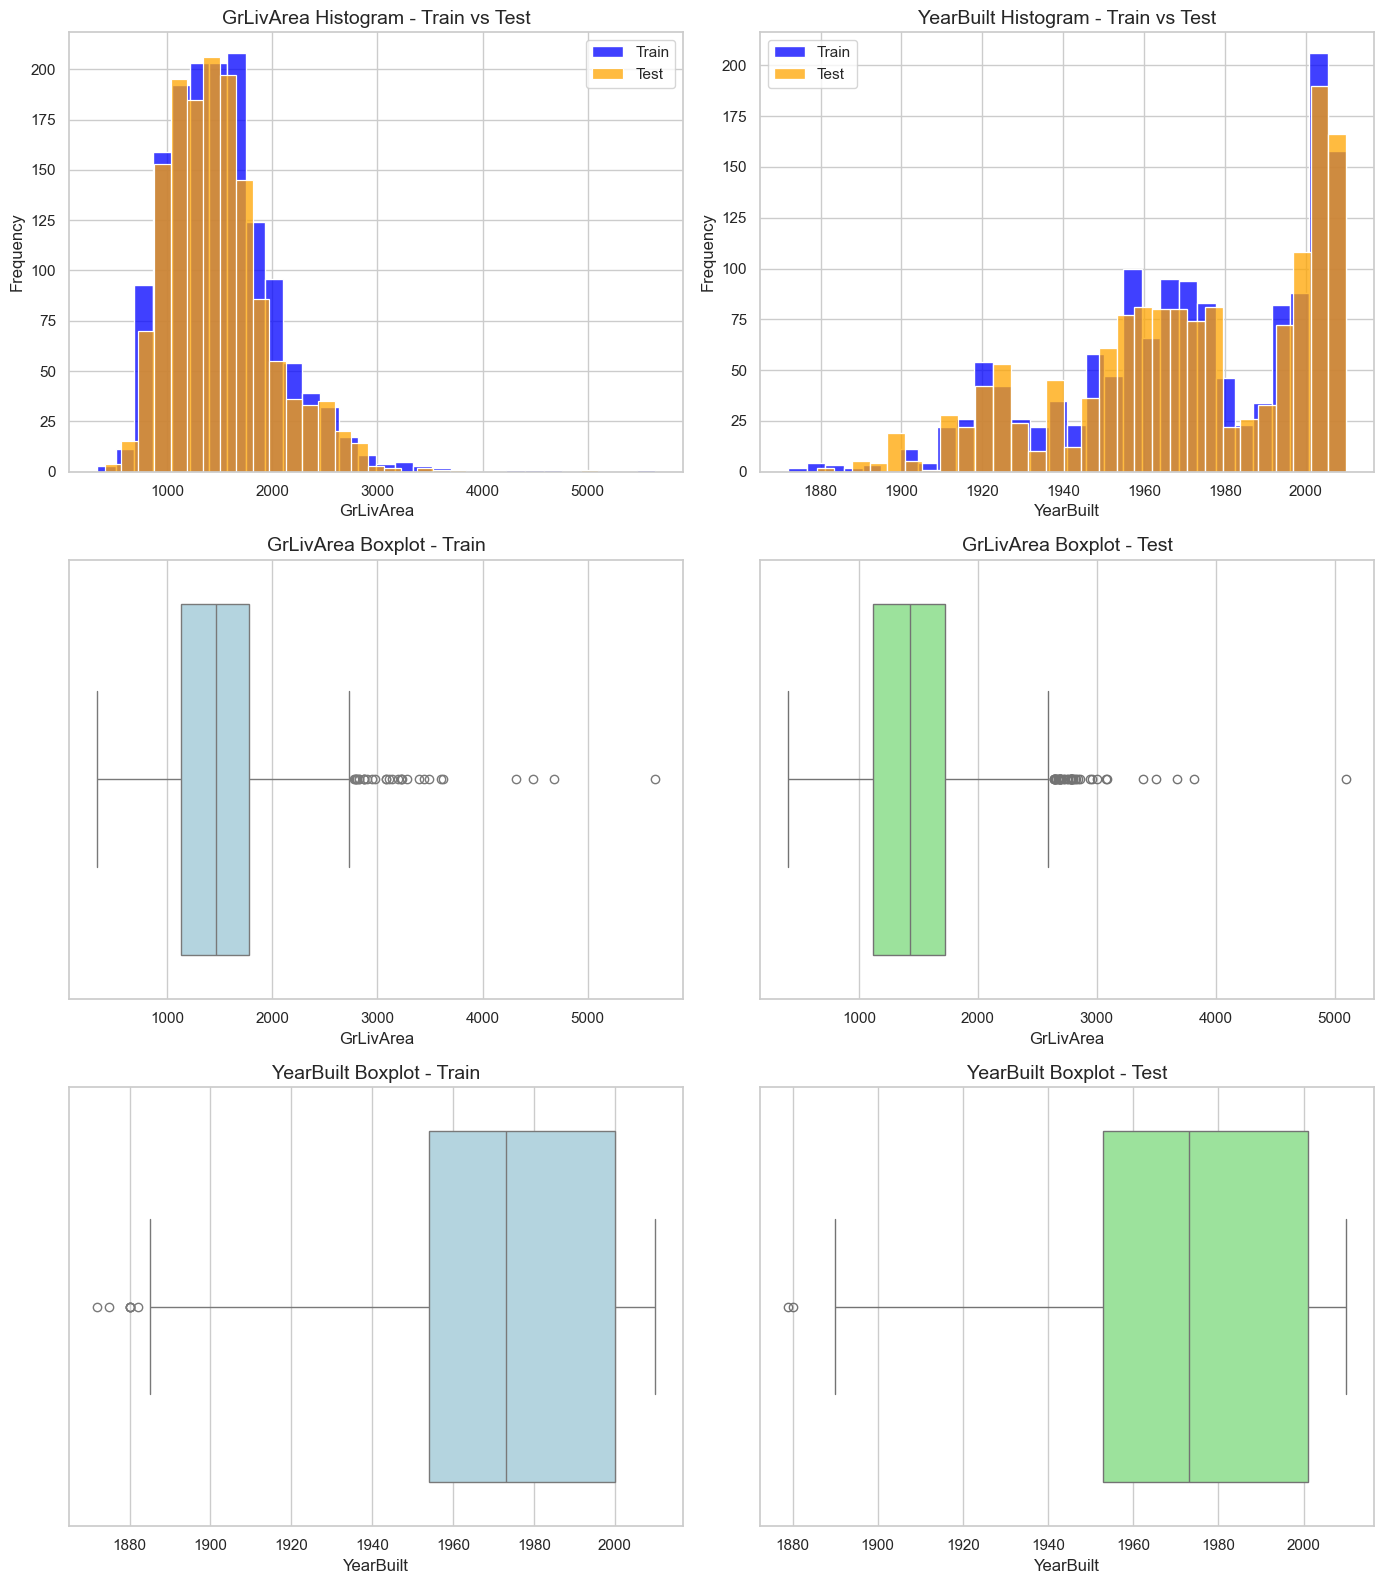

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the 4x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Row 1: GrLivArea Histogram - Train vs Test
sns.histplot(dtf.GrLivArea, kde=False, ax=axes[0, 0], color='blue', label='Train', bins=30)
sns.histplot(dtf_test.GrLivArea, kde=False, ax=axes[0, 0], color='orange', label='Test', bins=30)
axes[0, 0].set_title('GrLivArea Histogram - Train vs Test', fontsize=14)
axes[0, 0].set_xlabel('GrLivArea', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()

# Row 1: YearBuilt Histogram - Train vs Test
sns.histplot(dtf.YearBuilt, kde=False, ax=axes[0, 1], color='blue', label='Train', bins=30)
sns.histplot(dtf_test.YearBuilt, kde=False, ax=axes[0, 1], color='orange', label='Test', bins=30)
axes[0, 1].set_title('YearBuilt Histogram - Train vs Test', fontsize=14)
axes[0, 1].set_xlabel('YearBuilt', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()

# Row 2: GrLivArea Boxplot for Train
sns.boxplot(x=dtf.GrLivArea, ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('GrLivArea Boxplot - Train', fontsize=14)
axes[1, 0].set_xlabel('GrLivArea', fontsize=12)

# Row 2: GrLivArea Boxplot for Test
sns.boxplot(x=dtf_test.GrLivArea, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('GrLivArea Boxplot - Test', fontsize=14)
axes[1, 1].set_xlabel('GrLivArea', fontsize=12)

# Row 3: YearBuilt Boxplot for Train
sns.boxplot(x=dtf.YearBuilt, ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('YearBuilt Boxplot - Train', fontsize=14)
axes[2, 0].set_xlabel('YearBuilt', fontsize=12)

# Row 3: YearBuilt Boxplot for Test
sns.boxplot(x=dtf_test.YearBuilt, ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title('YearBuilt Boxplot - Test', fontsize=14)
axes[2, 1].set_xlabel('YearBuilt', fontsize=12)



# Show the final plot
plt.tight_layout()
plt.savefig("compare_train_test.png", dpi=300)
plt.show()
plt.close(fig)


### Comparing all categories test/train columns:
Chi-square test (one-way)

In [418]:
# Perform Chi-square tests for each categorical column
ks_res = []
for col in categorical_columns:
    try:
        train_freqs = dtf[col].value_counts() / dtf[col].value_counts().sum()
        test_freqs = dtf_test[col].value_counts() / dtf_test[col].value_counts().sum()

        if len(train_freqs) != len(test_freqs):
            trf = set(train_freqs.keys())
            tsf = set(test_freqs.keys())
            
            add_to_train = tsf - trf
            for t in add_to_train:
                train_freqs[t] = 0.0
            
            add_to_test = trf - tsf
            for t in add_to_test:
                test_freqs[t] = 0.0

        chi2, p = sts.chisquare(test_freqs, f_exp=train_freqs)
        ks_res.append({'col': col, 'chi2': chi2, 'p_val': p})
    except Exception as e:
        print(f"Error processing column {col}: {e}")
        pass

ks_df = pd.DataFrame(ks_res)
ks_df_sorted = ks_df.sort_values('p_val', ascending=True)
print(ks_df_sorted)

              col          chi2     p_val
4       Utilities  6.854010e-04  0.979114
38     MasVnrType  1.419624e-01  0.986365
0      CentralAir  2.840601e-04  0.986553
8      PavedDrive  1.074603e-02  0.994641
17   GarageFinish  6.170699e-02  0.995998
32      LandSlope  5.636528e-03  0.997186
31    FireplaceQu  2.026490e-01  0.999085
34       BsmtQual  3.221114e-02  0.999872
2        BsmtCond  2.610031e-02  0.999916
35    LandContour  3.495947e-03  0.999945
30   BsmtExposure  2.922577e-03  0.999958
10      ExterQual  2.679814e-03  0.999963
26         Street  1.938547e-09  0.999965
20    KitchenQual  2.266032e-03  0.999971
23       LotShape  1.759211e-03  0.999980
18      ExterCond  1.247164e-02  0.999981
15     GarageCond  3.678322e-02  0.999986
28      LotConfig  9.540172e-03  0.999989
9      GarageQual  3.265023e-02  0.999990
14       MSZoning  3.533153e-03  0.999998
22     GarageType  4.217408e-02  0.999998
21       BldgType  2.056833e-03  0.999999
1    BsmtFinType2  9.906686e-03  0

p-value close to 1: Indicates that the distributions are very similar; there is no significant difference between the distributions in the training and test datasets.

p-value < 0.05: Indicates a significant difference between the distributions in the training and test datasets.


### Independence Testing Categories Columns

a) To run a chi-square test of indepedence we need to first create a contingency table and only then run the test:

In [419]:
contingency_table = pd.crosstab(dtf.LotShape,dtf.SaleCondition)
contingency_table

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
LotShape,,,,,,
IR1,31,1,2,4,398,48
IR2,2,0,0,0,35,4
IR3,0,0,0,1,7,2
Reg,68,3,10,15,758,71


In [420]:
c, p, dof, expected = sts.chi2_contingency(contingency_table)
c,p

(np.float64(15.026444980007037), np.float64(0.44951400522655555))

The p-value shows that the null-hypothesis of independence cannot be rejected, therefore the two column are probably independent.

We can examine the expected table:

In [421]:
pd.DataFrame(expected,columns=contingency_table.columns,index=contingency_table.index)


SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
LotShape,,,,,,
IR1,33.482192,1.326027,3.978082,6.630137,397.145205,41.438356
IR2,2.836301,0.112329,0.336986,0.561644,33.642466,3.510274
IR3,0.691781,0.027397,0.082192,0.136986,8.205479,0.856164
Reg,63.989726,2.534247,7.602740,12.671233,759.006849,79.195205


Performing the chi-square test over all columns:


In [422]:
chi_res=[]
for i1,c1 in enumerate(categorical_columns):
    for i2,c2 in enumerate(categorical_columns):
        try:
            contingency_table = pd.crosstab(dtf[c1],dtf[c2])
            c, p,_,_ = sts.chi2_contingency(contingency_table)
        except:
            c=None
            p=None
        chi_res.append({'col1':c1,'col2':c2,'score':c,'p_val':p})

chi_df= pd.DataFrame(chi_res)
chi_df.head()

,col1,col2,score,p_val
0,CentralAir,CentralAir,1443.608250,0.000000e+00
1,CentralAir,BsmtFinType2,5.098150,4.040197e-01
2,CentralAir,BsmtCond,149.018403,3.304188e-31
3,CentralAir,Functional,17.415508,7.871584e-03
4,CentralAir,Utilities,0.000000,1.000000e+00


Examining the column-pairs with high P value (meaning, the columns may be dependent)



In [423]:
chi_df[chi_df.p_val>0.3].sort_values('p_val',ascending=False)

,col1,col2,score,p_val
130,Functional,Condition2,1.114390,1.000000
481,Heating,Condition2,0.339624,1.000000
510,Condition2,Functional,1.114390,1.000000
518,Condition2,RoofMatl,0.274790,1.000000
519,Condition2,Heating,0.339624,1.000000
...,...,...,...,...
939,SaleType,Functional,51.924898,0.323542
820,BldgType,BsmtFinType2,22.535274,0.312185
60,BsmtFinType2,BldgType,22.535274,0.312185
52,BsmtFinType2,Condition2,38.703008,0.306079


Lets see the contingency table of Condition2 and Heating

In [424]:
contingency_table = pd.crosstab(dtf['Heating'],dtf['Condition2'])
contingency_table

Condition2,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
Heating,,,,,,,,
Floor,0,0,1,0,0,0,0,0
GasA,2,6,1413,1,2,1,1,2
GasW,0,0,18,0,0,0,0,0
Grav,0,0,7,0,0,0,0,0
OthW,0,0,2,0,0,0,0,0
Wall,0,0,4,0,0,0,0,0


# Examining Correlations to the target feature:



1. Pearson 

<Axes: >

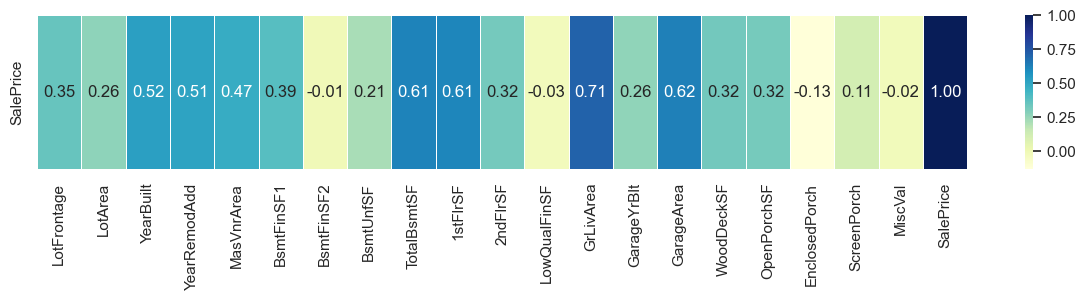

In [425]:
dtf_corr = dtf[very_numerical].corr(method="pearson").loc[["SalePrice"]]
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

2. Spearman

<Axes: >

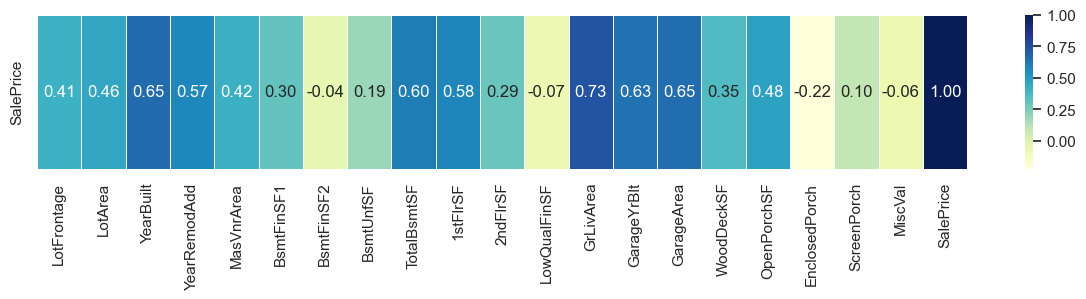

In [426]:
dtf_corr = dtf[very_numerical].corr(method="spearman").loc[["SalePrice"]]
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

Spearman's rank correlation is more suitable for ordinal features, such as rankings, so lets try on the categories features

<Axes: ylabel='None-None'>

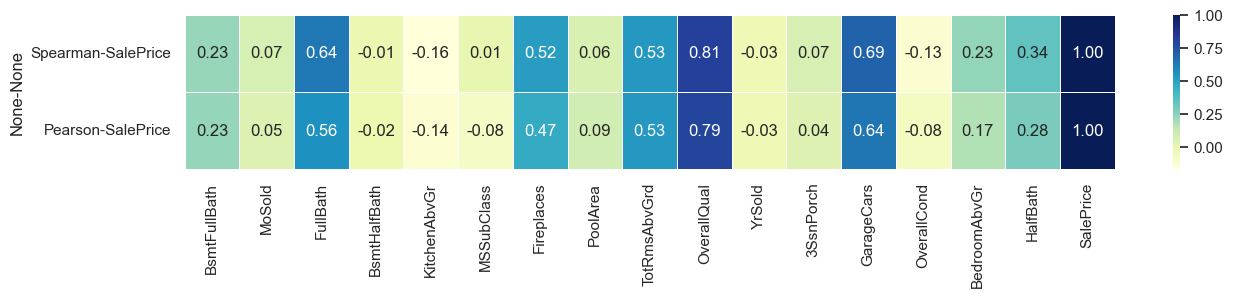

In [427]:
ordinals = list(set(numeric_columns) - set(very_numerical))
ordinals.append('SalePrice')
# Calculate correlations
spearman_corr = dtf[ordinals].corr(method="spearman").loc[["SalePrice"]]
pearson_corr = dtf[ordinals].corr(method="pearson").loc[["SalePrice"]]

# Concatenate the correlations
dtf_corr = pd.concat([spearman_corr, pearson_corr], keys=['Spearman', 'Pearson'])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)


Since SalePrice is a numeric variable, we can convert it into an ordinal variable by binning. This allows us to examine if the correlation has changed.

In [428]:
binned_price = pd.cut(dtf.SalePrice,10)
binned_price.head()

Id
1    (178920.0, 250930.0]
2    (178920.0, 250930.0]
3    (178920.0, 250930.0]
4    (106910.0, 178920.0]
5    (178920.0, 250930.0]
Name: SalePrice, dtype: category
Categories (10, interval[float64, right]): [(34179.9, 106910.0] < (106910.0, 178920.0] < (178920.0, 250930.0] < (250930.0, 322940.0] ... (466960.0, 538970.0] < (538970.0, 610980.0] < (610980.0, 682990.0] < (682990.0, 755000.0]]

<Axes: ylabel='None-None'>

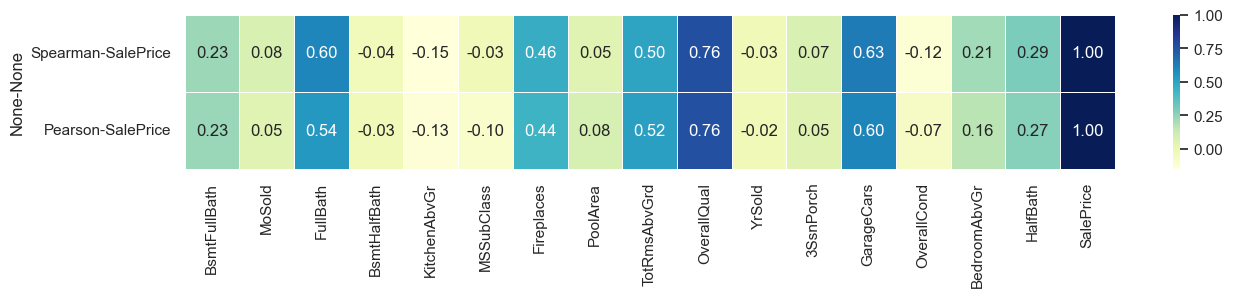

In [429]:
binned_price = binned_price.cat.codes
dtf_ordinal = dtf[ordinals]
dtf_ordinal["SalePrice"] = binned_price

spearman_corr = dtf_ordinal.corr(method="spearman").loc[["SalePrice"]]
pearson_corr = dtf_ordinal.corr(method="pearson").loc[["SalePrice"]]

dtf_corr = pd.concat([spearman_corr, pearson_corr], keys=['Spearman', 'Pearson'])
fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)


We can observe a slight change, with the indices becoming marginally closer to zero.

A heatmap of Spearman's correlation coefficients for the ordinal features:

<Axes: >

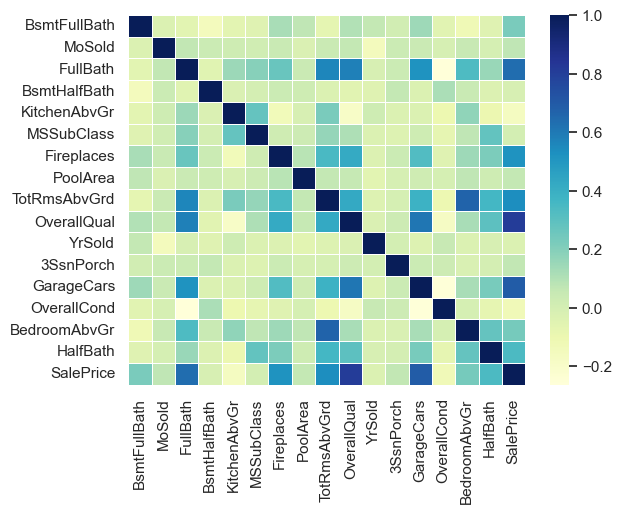

In [430]:
dtf_corr = dtf[ordinals].corr(method="spearman")
sns.heatmap(dtf_corr, annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)

### Linear Regression - Predict SalePrice

1. Based on GrLivArea

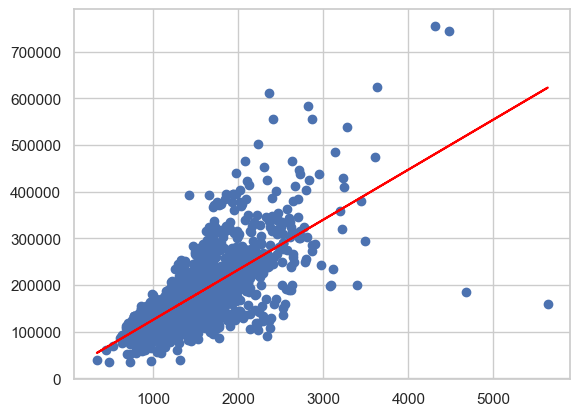

In [431]:
from sklearn.linear_model import LinearRegression

Xcol = 'GrLivArea'
Ycol = 'SalePrice'

X_gla = dtf[Xcol]
Y= dtf[Ycol]

model = LinearRegression()
X_gla = X_gla.values.reshape(-1,1)
Y_pred = model.fit(X_gla,Y).predict(X_gla)

plt.scatter(X_gla, Y)
plt.plot(X_gla, Y_pred, color='red')
plt.show()

SK-Learn can give us the learned $\beta_0$ and $\beta_1$

In [432]:
model.coef_


array([107.13035897])

In [433]:
model.intercept_


np.float64(18569.025856487453)

Let's validate that the $\beta_1$ coefficient we got from running linear regression is equal to the $\beta_1$ calculated using the formula:


$$
\beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}
$$

In [434]:
beta_1_model = model.coef_

X_gla = dtf[Xcol]
sxy = np.sum( (X_gla-X_gla.mean()) * (Y-Y.mean()))
sxx = np.sum( np.square(X_gla-X_gla.mean()))
beta_1_manual = sxy/sxx

# Validation
if np.isclose(beta_1_manual, beta_1_model):
    print("Validation successful: The manually calculated beta_1 matches the model's beta_1")
else:
    print("Validation failed: The manually calculated beta_1 does not match the model's beta_1")


Validation successful: The manually calculated beta_1 matches the model's beta_1


Using StatsModels for a deeper understanding of the regression

The $R^2$ (R-squared) value is a statistical measure of how much better our regressor is than a model that returns everyone the average. It is calculated using the following formula:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:

- $y_i$ are the actual values of the dependent variable.
- $\hat{y}_i$ are the predicted values from the regression model.
- $\bar{y}$ is the mean of the actual values.
- $n$ is the number of observations.

- A high $ R^2$ value (closer to 1) indicates that a large proportion of the variance in the dependent variable is explained by the independent variables, signifying a good fit of the model.
- A negative $R^2$ value indicates that the model performs worse than a horizontal line model that simply returns the mean of the dependent variable for all predictions.

R^2 score: 0.49628432436351844


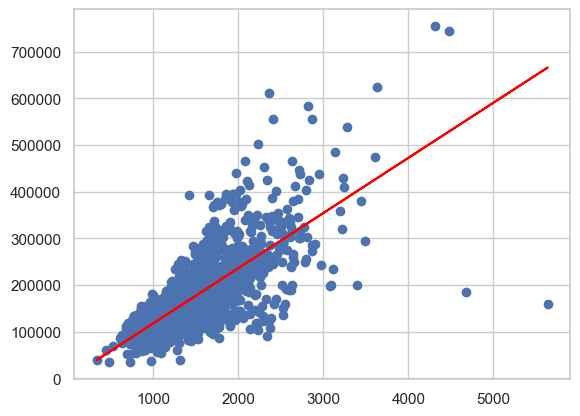

In [435]:
model = sm.OLS(Y, X_gla)
results = model.fit()
Y_pred = results.fittedvalues

r2 = r2_score(Y, Y_pred)
print(f'R^2 score: {r2}')

plt.scatter(X_gla, Y)
plt.plot(X_gla, Y_pred, color='red')
plt.show()

In [436]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                        0.00
Time:                        14:44:34   Log-Likelihood:                         -18043.
No. Observations:                1460   AIC:                                  3.609e+04
Df Residuals:                    1459   BIC:                                  3.609e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    118.0691      0.920    128.337      0.000     116.264     119.874
==============================================================================
Omnibus:                      242.301   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.101
Skew:                          -0.041   Prob(JB):                         0.00
Kurtosis:                      11.504   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Based on numerical features 

R^2 score: 0.7841319310130594


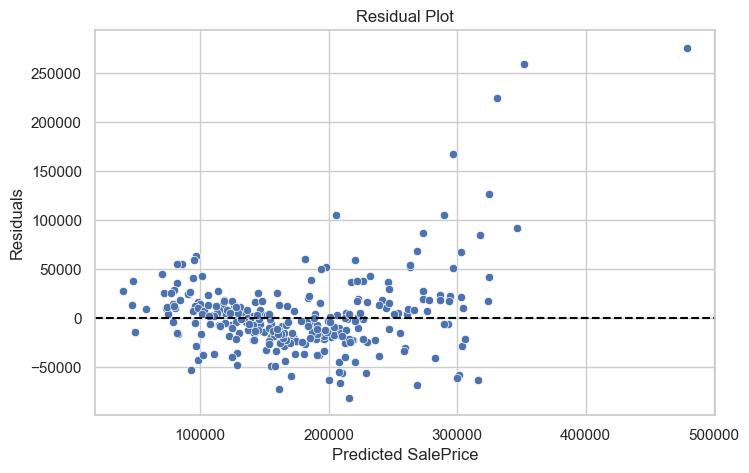

In [437]:
from sklearn.model_selection import train_test_split
plt.close('all')
# Splitting data into train and test sets
X = dtf[very_numerical].drop(Ycol, axis=1)
Y = dtf[Ycol]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model on the training set
sk_ols_model = LinearRegression()
sk_ols_model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = sk_ols_model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f'R^2 score: {r2}')

# Calculating residuals
residuals = Y_test - Y_pred

# Plotting the residuals
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=Y_pred, y=residuals, ax=ax)
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('Predicted SalePrice')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.savefig("plots/error_in_high_price.png", dpi=300)
plt.show()
plt.close(fig)


According to the $R^2$ value, it seems that the model is better when we added the numerical features.

The residual plot shows that most residuals are clustered around zero, indicating a reasonably good fit by the linear regression model. However, there are a few outliers, as the spread of residuals increases with higher predicted SalePrices, suggesting areas for model improvement.

Using StatsModels for a deeper understanding of the regression

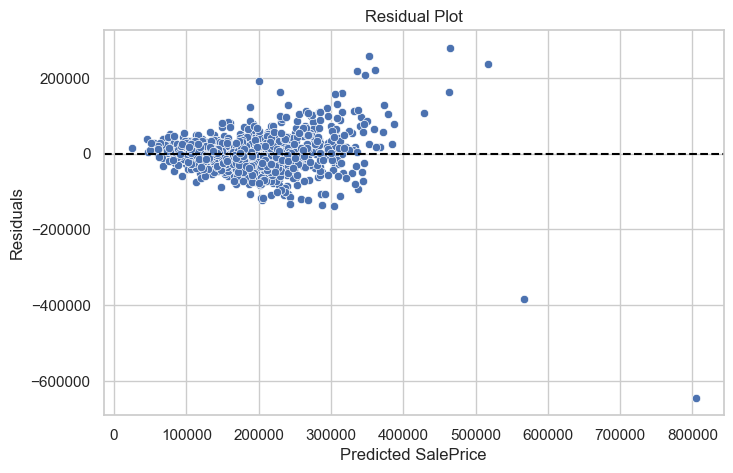

In [438]:
sm_model = sm.OLS(Y, X)
results = sm_model.fit()
Y_pred2 = results.fittedvalues

residuals = Y - Y_pred2

# Plotting the residuals
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=Y_pred2, y=residuals, ax=ax)
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel('Predicted SalePrice')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()
plt.close(fig)



In [439]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1553.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                        0.00
Time:                        14:44:34   Log-Likelihood:                         -17674.
No. Observations:                1460   AIC:                                  3.538e+04
Df Residuals:                    1442   BIC:                                  3.548e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage    -107.1400     60.370     -1.775      0.076    -225.561      11.281
LotArea           0.2272      0.127      1.784      0.075      -0.023       0.477
YearBuilt       164.9660     54.206      3.043      0.002      58.636     271.296
YearRemodAdd   -159.9851     53.591     -2.985      0.003    -265.109     -54.861
MasVnrArea       41.8503      7.432      5.631      0.000      27.272      56.429
BsmtFinSF1       20.2045      2.829      7.142      0.000      14.655      25.754
BsmtFinSF2       -0.2407      5.593     -0.043      0.966     -11.212      10.730
BsmtUnfSF         9.2755      2.634      3.521      0.000       4.108      14.443
TotalBsmtSF      29.2393      3.963      7.377      0.000      21.464      37.014
1stFlrSF         29.7103      7.374      4.029      0.000      15.246      44.175
2ndFlrSF         36.3157      6.661      5.452      0.000      23.249      49.383
LowQualFinSF    -36.1504     18.430     -1.961      0.050     -72.304       0.003
GrLivArea        29.8756      6.287      4.752      0.000      17.543      42.208
GarageYrBlt      -7.2842      3.173     -2.296      0.022     -13.509      -1.060
GarageArea       92.5147      8.170     11.324      0.000      76.488     108.541
WoodDeckSF       52.2137      9.922      5.262      0.000      32.750      71.677
OpenPorchSF      44.2536     18.886      2.343      0.019       7.207      81.300
EnclosedPorch   -43.7872     20.271     -2.160      0.031     -83.550      -4.024
ScreenPorch      52.0553     21.281      2.446      0.015      10.310      93.800
MiscVal          -1.0033      2.331     -0.430      0.667      -5.576       3.570
==============================================================================
Omnibus:                      856.670   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96978.647
Skew:                          -1.779   Prob(JB):                         0.00
Kurtosis:                      42.768   Cond. No.                     1.60e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.25e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R^2 score: 0.8932093025001975
3      OverallQual
15       GrLivArea
11     TotalBsmtSF
13        2ndFlrSF
8       BsmtFinSF1
12        1stFlrSF
2          LotArea
26      GarageArea
5        YearBuilt
25      GarageCars
1      LotFrontage
24     GarageYrBlt
28     OpenPorchSF
6     YearRemodAdd
22    TotRmsAbvGrd
Name: Feature, dtype: object
Number of categorical features in top 15: 0
Number of numerical features in top 15: 15


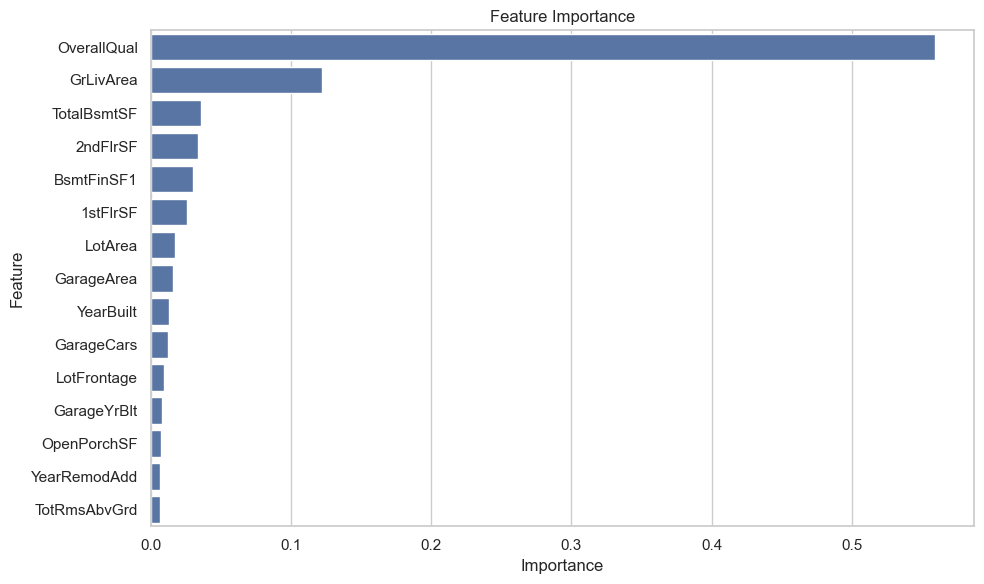

In [456]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')
# Assuming dtf is your DataFrame and Ycol is the target column
numeric_columns = dtf.dtypes[(dtf.dtypes == "float64") | (dtf.dtypes == "int64")].index.tolist()
very_numerical = [nc for nc in numeric_columns if dtf[nc].nunique() > 20]
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]

# One-hot encode categorical columns
dtf_encoded = pd.get_dummies(dtf, columns=categorical_columns, drop_first=True)

# Splitting data into features and target
X = dtf_encoded.drop(Ycol, axis=1)
Y = dtf[Ycol]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest model on the training set
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f'R^2 score: {r2}')



# Calculate feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)
# Count how many of the top 15 are categorical and how many are numerical
top_15_features = importance_df['Feature']
print(top_15_features)
# Checking if each feature is categorical or numerical
categorical_count = sum(feature.startswith(tuple(categorical_columns)) for feature in top_15_features)
numerical_count = len(top_15_features) - categorical_count

# Print the counts
print(f'Number of categorical features in top 15: {categorical_count}')
print(f'Number of numerical features in top 15: {numerical_count}')
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()




### Calculating Variance Inflation Factors


In [440]:
vif_dict = {}
for i, name in enumerate(X.columns):
    v = variance_inflation_factor(X.values,i)
    vif_dict[name]=v.round()
vifs = pd.Series(vif_dict)    
vifs.sort_values(ascending=False)

2ndFlrSF            inf
LowQualFinSF        inf
BsmtFinSF1          inf
BsmtFinSF2          inf
BsmtUnfSF           inf
TotalBsmtSF         inf
1stFlrSF            inf
GrLivArea           inf
YearBuilt        8597.0
YearRemodAdd     8518.0
GarageYrBlt        28.0
LotFrontage        15.0
GarageArea         14.0
LotArea             3.0
MasVnrArea          2.0
WoodDeckSF          2.0
OpenPorchSF         2.0
EnclosedPorch       1.0
ScreenPorch         1.0
MiscVal             1.0
dtype: float64

Investigating Collinearity:

In [441]:
vif_col = '2ndFlrSF'
z = dtf[vif_col]
Xv = X.drop(vif_col,axis=1)

modelv = sm.OLS(z, Xv)
results = modelv.fit()

r= results.params.round()
r = r[r.abs()>0]
r

1stFlrSF       -1.0
LowQualFinSF   -1.0
GrLivArea       1.0
dtype: float64

In [442]:
dtf[r.index.tolist()+[vif_col]].head()

,1stFlrSF,LowQualFinSF,GrLivArea,2ndFlrSF
Id,,,,
1,856,0,1710,854
2,1262,0,1262,0
3,920,0,1786,866
4,961,0,1717,756
5,1145,0,2198,1053


### Let's see if our model is better when Y is transformed

<Axes: >

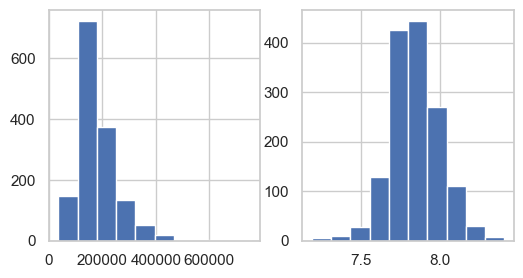

In [443]:
bc = sts.boxcox
bcY, _ = bc(Y)
fig, axes = plt.subplots(1,2,figsize=(6,3))
Y.hist(ax=axes[0])
pd.Series(bcY).hist(ax=axes[1])


In [444]:
X_train, X_test, bcY_train, bcY_test = train_test_split(X, bcY, test_size=0.2, random_state=42)

# Training the model on the training set
sk_ols_model = LinearRegression()
sk_ols_model.fit(X_train, bcY_train)

# Making predictions on the test set
bcY_pred = sk_ols_model.predict(X_test)
r2 = r2_score(bcY_test, bcY_pred)
print(f'R^2 score: {r2}')

R^2 score: 0.8184623533563993


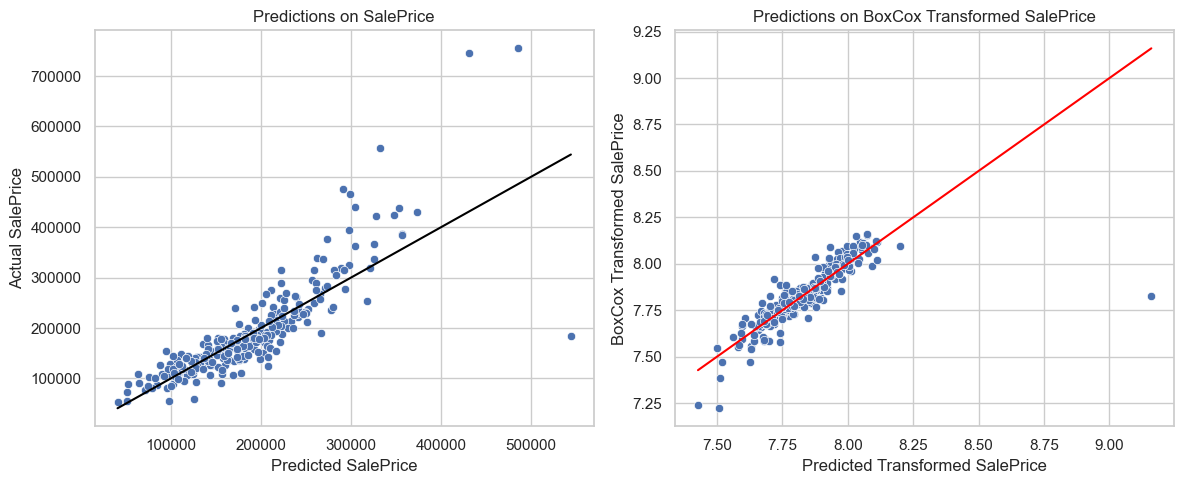

In [445]:
# Assuming you already have X, Y (raw labels), and bcY (BoxCox-transformed labels)
plt.close('all')
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train_bc, X_test_bc, bcY_train, bcY_test = train_test_split(X, bcY, test_size=0.2)

# Train the model on raw Y (without BoxCox transformation)
model_raw = LinearRegression()
model_raw.fit(X_train, Y_train)

# Train the model on transformed bcY (BoxCox-transformed target)
model_bc = LinearRegression()
model_bc.fit(X_train_bc, bcY_train)

# Predictions on the test set
Y_pred_raw = model_raw.predict(X_test)  # Prediction on raw target
Y_pred_bc = model_bc.predict(X_test_bc)  # Prediction on transformed target

# Plotting the actual vs predicted SalePrice (raw and BoxCox transformed)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Raw Y vs Predictions
sns.scatterplot(x=Y_pred_raw, y=Y_test, ax=axes[0])
sns.lineplot(x=Y_pred_raw, y=Y_pred_raw, ax=axes[0], color='black')  # Line showing perfect prediction
axes[0].set_xlabel("Predicted SalePrice")
axes[0].set_ylabel("Actual SalePrice")
axes[0].set_title("Predictions on SalePrice")

# Right: BoxCox Transformed Y vs Predictions
sns.scatterplot(x=Y_pred_bc, y=bcY_test, ax=axes[1])
sns.lineplot(x=Y_pred_bc, y=Y_pred_bc, ax=axes[1], color='red')  # Line showing perfect prediction
axes[1].set_xlabel("Predicted Transformed SalePrice")
axes[1].set_ylabel("BoxCox Transformed SalePrice")
axes[1].set_title("Predictions on BoxCox Transformed SalePrice")

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("plots/predict_saleprice.png", dpi=300)
plt.show()


The right plot shows an improved fit with the BoxCox transformation, evidenced by the higher $ R^2 $ value, indicating better variance explanation and more accurate predictions.

R^2 score on test data for fold: 0.21883204401867007


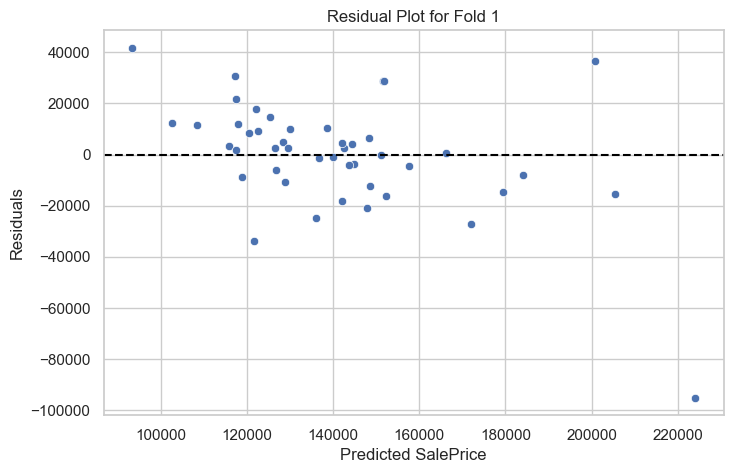

R^2 score on test data for fold: 0.6488419483673924


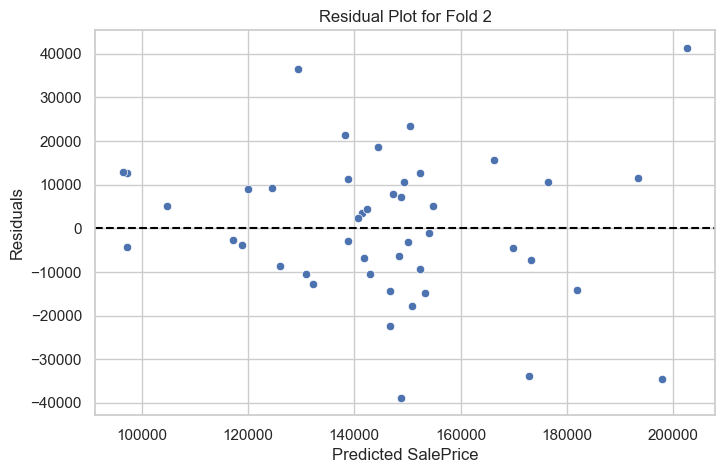

R^2 score on test data for fold: 0.7648535493379451


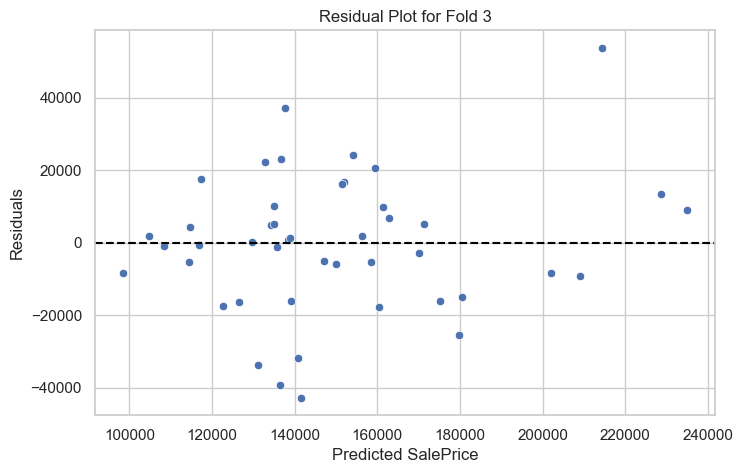

R^2 score on test data for fold: 0.6495136618473942


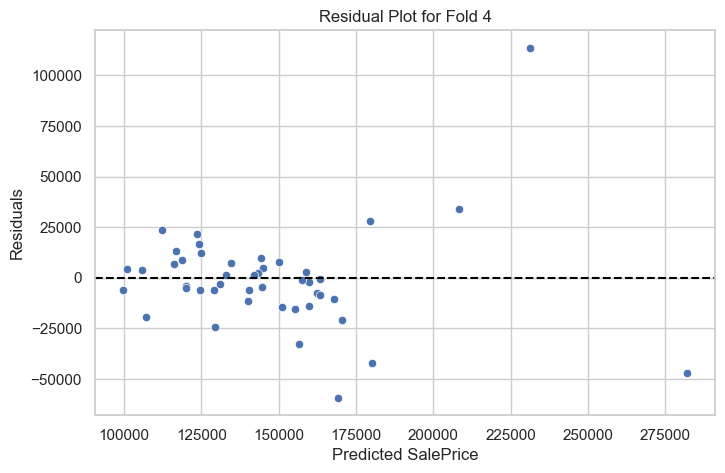

R^2 score on test data for fold: 0.326905941798196


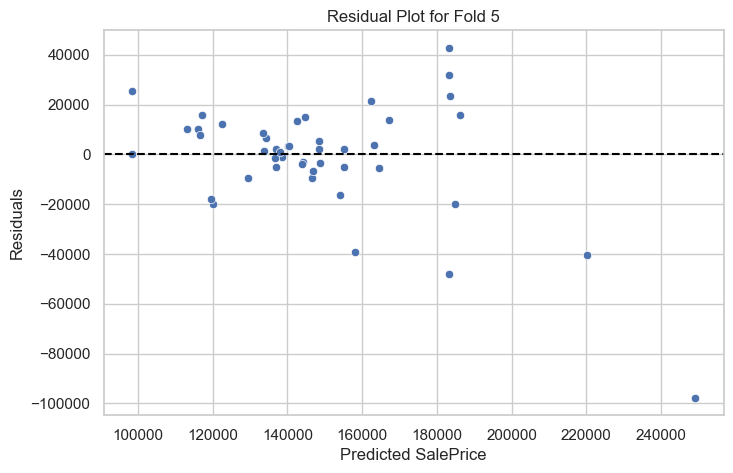

Average R^2 score across 5 folds: 0.5217894290739196


In [446]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Filter the data for the NAmes neighborhood
dtf_na = dtf[dtf['Neighborhood'] == 'NAmes']

# Prepare X and Y for the NAmes neighborhood
X = dtf_na[very_numerical]
Y = dtf_na[Ycol]

# Remove 'SalePrice' from X if it's still present
if 'SalePrice' in X.columns:
    X = X.drop(columns=['SalePrice'])

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True)

# Initialize a list to hold R^2 scores for each fold
r2_scores = []
coefficients_list = []
scaler = StandardScaler()

# Cross-validation loop
for train_index, test_index in kf.split(X):
    # Split the data into training and testing for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Normalize X_train and X_test using the scaler
    X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
    X_test = scaler.transform(X_test)        # Only transform the test data

    
    # Fit the linear regression model on the training data
    sk_ols_model = LinearRegression()
    
    sk_ols_model.fit(X_train, Y_train)
    
    # Predict SalePrice on the test data
    Y_pred_test = sk_ols_model.predict(X_test)
    
    coefficients_list.append(sk_ols_model.coef_)
    
    # Calculate the R^2 score on the test set for this fold
    r2_test = r2_score(Y_test, Y_pred_test)
    r2_scores.append(r2_test)
    print(f'R^2 score on test data for fold: {r2_test}')
    
    # Calculate residuals
    residuals_test = Y_test - Y_pred_test
    
    # Plot the residuals for this fold
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x=Y_pred_test, y=residuals_test, ax=ax)
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel('Predicted SalePrice')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residual Plot for Fold {len(r2_scores)}')
    plt.show()

# After cross-validation, display the average R^2 score
avg_r2_score = sum(r2_scores) / len(r2_scores)
print(f'Average R^2 score across 5 folds: {avg_r2_score}')





In [447]:
avg_coefficients = np.mean(coefficients_list, axis=0)
print("\nAverage Coefficients across all folds:")
for feature, avg_coef in zip(X.columns, avg_coefficients):
    print(f"{feature}: {avg_coef}")



Average Coefficients across all folds:
LotFrontage: 3952.2669985898524
LotArea: 1898.5201267985856
YearBuilt: 6042.819301187943
YearRemodAdd: 4936.08035165947
MasVnrArea: 673.7194021631724
BsmtFinSF1: 6093.498407051634
BsmtFinSF2: 393.1050493664372
BsmtUnfSF: -2376.9330374806323
TotalBsmtSF: 3396.8662814910276
1stFlrSF: 6663.3111649404
2ndFlrSF: 5013.733945995832
LowQualFinSF: 673.6653574744442
GrLivArea: 8713.815971742675
GarageYrBlt: 1174.397440868199
GarageArea: 1083.0936359898485
WoodDeckSF: 1045.2971467009343
OpenPorchSF: 2491.4344438512694
EnclosedPorch: 1398.0237205923393
ScreenPorch: 4410.562800878448
MiscVal: 1468.9048508360472
